In [8]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt # 画图模块
import matplotlib.dates as mdates # 日期格式处理模块
from matplotlib import style # 用来自定义图表风格的模块

%matplotlib inline
%config InlineBackend.figure_format = 'svg' # 提高分辨率

# from matplotlib.font_manager import FontProperties # 画图自定义字体
# from pylab import mpl # 画图自定义字体
# mpl.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
# # mpl.rcParams['font.family'] = 'Times New Roman' # 指定默认字体

导入数据

In [9]:
# 导入处理
data = pd.read_csv('D:/c-j-l-j-l-cc-1/datasets/000001xin.csv')
data['Day'] = pd.to_datetime(data['Day'],format = '%Y/%m/%d')
data.set_index('Day',inplace = True)
data['Close'] = pd.to_numeric(data['Close'],errors = 'coerce')
data['Preclose'] = data['Close'].shift(1)
data['Return'] = (data['Close'] - data['Preclose'])/data['Preclose']
data

,Preclose,Open,Highest,Lowest,Close,Volume,Money,Return
Day,,,,,,,,
1990-12-19,NaN,96.050,99.980,95.790,99.980,126000.00,4.940000e+05,NaN
1990-12-20,99.980,104.300,104.390,99.980,104.390,19700.00,8.400000e+04,0.044109
1990-12-21,104.390,109.070,109.130,103.730,109.130,2800.00,1.600000e+04,0.045407
1990-12-24,109.130,113.570,114.550,109.130,114.550,3200.00,3.100000e+04,0.049666
1990-12-25,114.550,120.090,120.250,114.550,120.250,1500.00,6.000000e+03,0.049760
...,...,...,...,...,...,...,...,...
2024-09-24,2748.918,2770.754,2863.152,2761.372,2863.126,4776195.45,4.427953e+07,0.041547
2024-09-25,2863.126,2901.419,2952.451,2889.048,2896.306,5682598.16,5.166981e+07,0.011589
2024-09-26,2896.306,2893.745,3000.953,2889.014,3000.953,5763192.61,5.246691e+07,0.036131


Monthly Return

In [10]:
data_new = data['1995-01-01':'2024-12-31'].copy()
Month_data = data_new.resample('M')['Return'].apply(lambda x:(1+x).prod()-1).to_frame()
Month_data

,Return
Day,
1995-01-31,-0.131631
1995-02-28,-0.023694
1995-03-31,0.177803
1995-04-30,-0.103552
1995-05-31,0.207922
...,...
2024-05-31,-0.005801
2024-06-30,-0.038684
2024-07-31,-0.009656


画图Plot

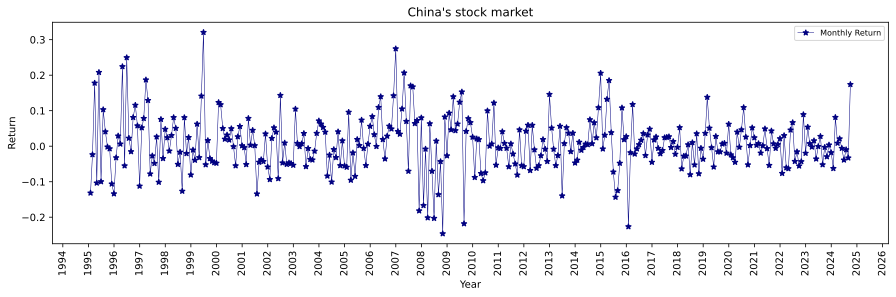

In [18]:
fig, ax = plt.subplots(figsize = (15,4))

ax.plot('Return', # 图片数据
'*-', # 图片类型,
color = '#000080', # 图片颜色
label = 'Monthly Return', # 图片标签
linewidth = 0.5, # 图片线宽
data = Month_data) # 图片数据来源
ax.set_title("China's stock market") # 图片标题
ax.set_ylabel('Return') # 图片y轴标签
ax.set_xlabel('Year') # 图片x轴标签

# 设置x轴的日期显示格式
data_format = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(data_format)
ax.xaxis.set_major_locator(mdates.YearLocator())

# 转置x轴的日期显示格式
plt.xticks(rotation = 90)

# 添加图例
plt.legend(loc='upper right',fontsize = 8)
fig.savefig('China_Stock_Market_Monthly_Return.pdf')
plt.show();

In [19]:
Month_data['2016':'2016']

,Return
Day,
2016-01-31,-0.226487
2016-02-29,-0.018125
2016-03-31,0.117538
2016-04-30,-0.021838
2016-05-31,-0.007385
2016-06-30,0.004454
2016-07-31,0.016975
2016-08-31,0.035629
2016-09-30,-0.026184


In [20]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, scalex=True, scaley=True, data=None, **kwargs)
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the appearance. Line properties and *fmt* can be mixed.
    The f

In [22]:
Quarterly_data = data_new.resample('Q')['Return'].apply(lambda x:(1+x).prod()-1).to_frame()
Yearly_data = data_new.resample('Y')['Return'].apply(lambda x:(1+x).prod()-1).to_frame()
Quarterly_data
Yearly_data

,Return
Day,
1995-12-31,-0.142899
1996-12-31,0.651425
1997-12-31,0.302153
1998-12-31,-0.039695
1999-12-31,0.191750
2000-12-31,0.517277
2001-12-31,-0.206180
2002-12-31,-0.175167
2003-12-31,0.102670


In [23]:
print('中国股票市场月度收益率的均值',Month_data['2019':'2023']['Return'].mean().round(4)*100,'%')

中国股票市场月度收益率的均值 0.38 %


In [24]:
print('中国股票市场收益率年化均值是：',Yearly_data['1995':'2023']['Return'].mean().round(4)*100,'%')

中国股票市场收益率年化均值是： 12.16 %
